# **1️⃣ Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

columns = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]

df = pd.read_csv(url, names=columns)

df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
# preview
print(df.head())
print(df.info())
print(df.describe())

# check missing values
print(df.isnull().sum())

# class distribution
print(df['Type'].value_counts())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  


# **2️⃣ Data Visualizatio**

## **Histograms (Feature Distributions)**

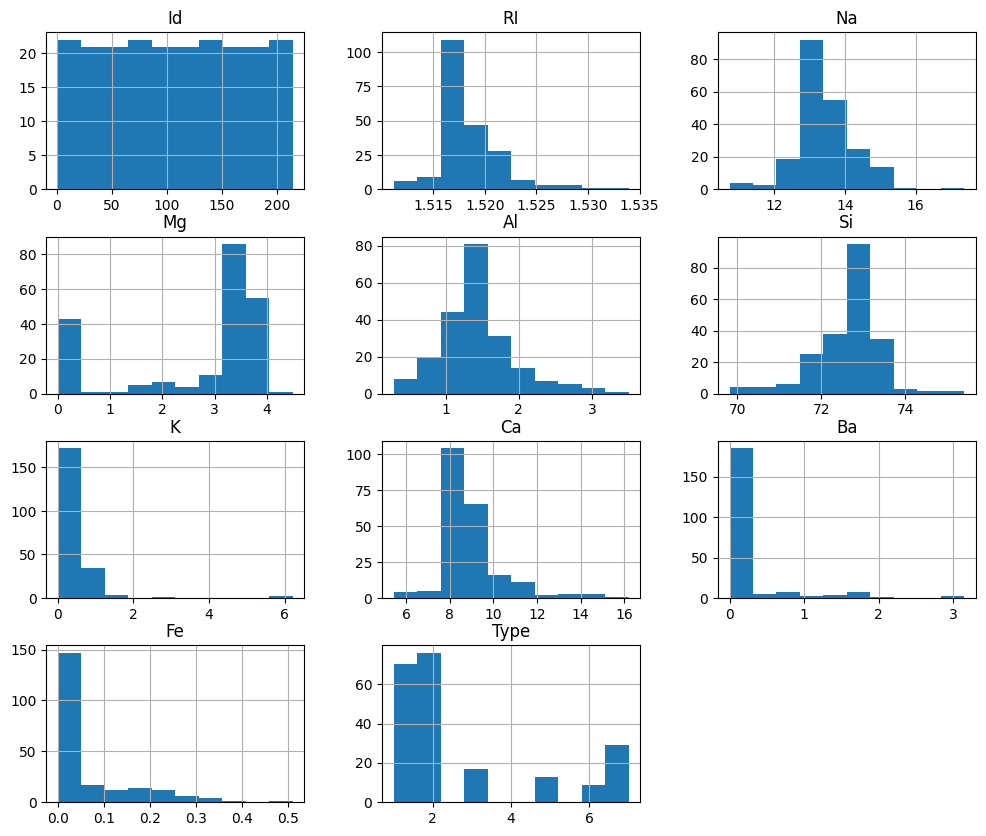

In [8]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,10))
plt.show()

## **Boxplots (Outlier Detection)**

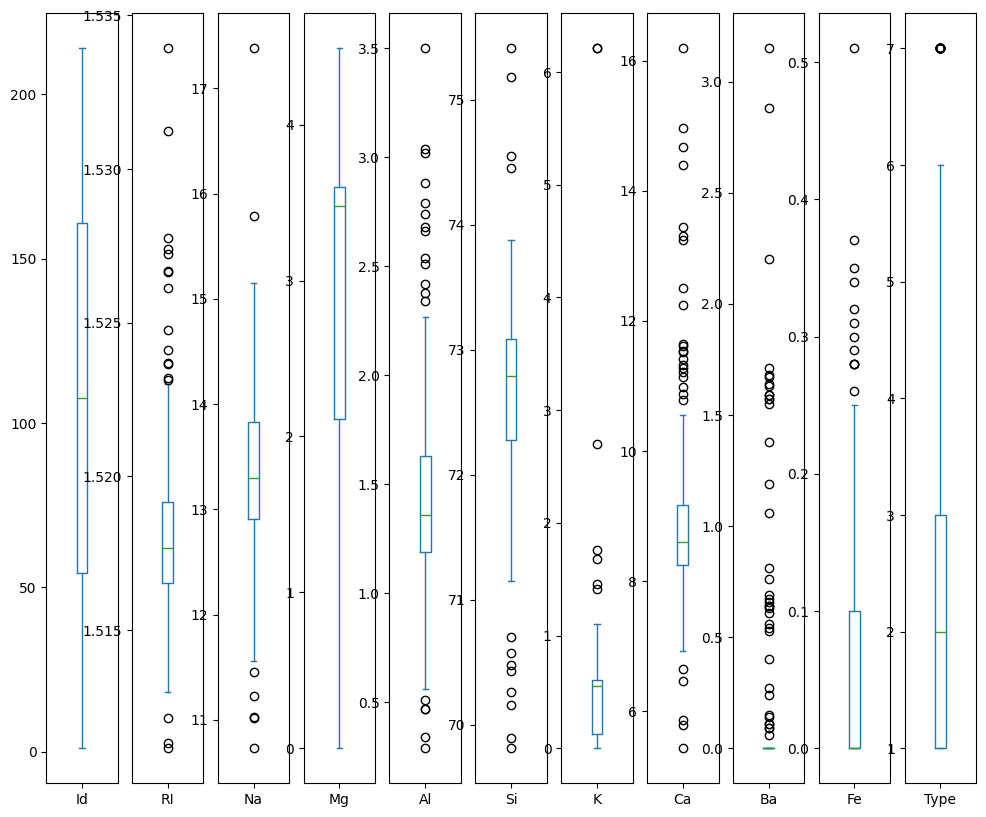

In [12]:
df.plot(kind='box', subplots=True, figsize=(12,10))
plt.show()

## **Correlation Heatmap**

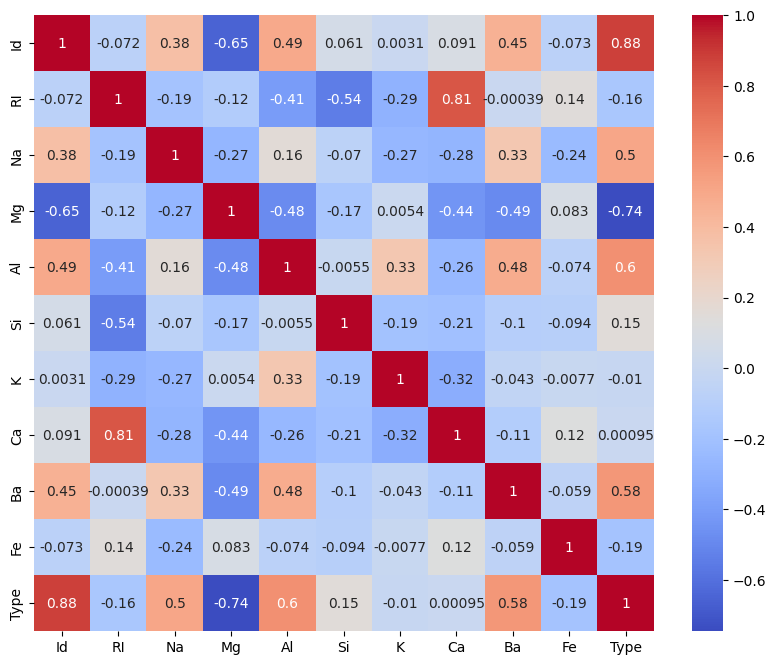

In [13]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# **3️⃣ Data Preprocessing**

## **3.1 Missing Values**

In [14]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## **3.2 Categorical Encoding**

In [15]:
y = df['Type']
X = df.drop('Type', axis=1)

## **3.3 Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **3.4 Handling Imbalanced Data**

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# **4️⃣ Random Forest Model Implementation**

## **4.1 Train-Test Split**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

## **4.2 Train Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

## **4.3 Model Evaluation**

In [20]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



## **Metrics Explained**

* Accuracy → overall correctness

* Precision → correctness of positive predictions

* Recall → ability to find all positives

* F1-score → balance between precision & recall

# **5️⃣ Bagging & Boosting Methods**

## **🔹 Bagging (Bootstrap Aggregating)**

**Concept**

* Train multiple models independently on random samples.

* Combine predictions (majority voting).

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bag.fit(X_train, y_train)
print("Bagging Accuracy:", bag.score(X_test, y_test))

Bagging Accuracy: 1.0


### **🔹 Boosting**

**Boosting trains models sequentially, correcting previous errors.**

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

print("AdaBoost Accuracy:", ada.score(X_test, y_test))

AdaBoost Accuracy: 0.6630434782608695


## **Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Gradient Boost Accuracy:", gb.score(X_test, y_test))

Gradient Boost Accuracy: 0.9891304347826086


| Feature     | Bagging            | Boosting                           |
| ----------- | ------------------ | ---------------------------------- |
| Training    | Parallel           | Sequential                         |
| Goal        | Reduce variance    | Reduce bias & variance             |
| Overfitting | Good control       | Can overfit if too many iterations |
| Example     | Random Forest      | AdaBoost, Gradient Boost           |
| Sampling    | Bootstrap sampling | Weighted learning                  |


## **What is Imbalanced Data?**

Imbalanced data occurs when the number of observations in one class is much larger than in other classes.

Example:

Class A → 90%

Class B → 10%

In such cases, a classifier may predict only the majority class and still achieve high accuracy, but it will perform poorly on the minority class.

# **There are three major approaches:**

## **1️⃣ Data-Level Methods (Resampling Techniques)**

**These methods modify the dataset before training.**

A) Oversampling

Oversampling increases the number of minority class samples.

Types:
• Random Oversampling

Duplicates minority samples randomly.

Advantage:

Simple to implement

No information loss

Disadvantage:

Can cause overfitting (duplicate records)

• SMOTE (Synthetic Minority Oversampling Technique)

SMOTE creates synthetic (artificial) samples instead of duplicating.

How it works:

Selects a minority sample

Finds its nearest neighbors

Creates synthetic data points between them

Advantages:

Reduces overfitting

Creates more realistic data distribution

Disadvantages:

May create noisy samples if data is complex

B) Undersampling

Undersampling reduces the number of majority class samples.

Advantages:

Faster training

Reduces bias toward majority class

Disadvantages:

Loss of important information

May reduce overall model performance

## **2️⃣ Algorithm-Level Methods**

Instead of modifying data, we modify the learning algorithm.

A) Class Weighting

In this approach:

Higher penalty is given to misclassification of minority class.

Model learns to pay more attention to rare classes.

This is commonly used in:

Logistic Regression

Random Forest

SVM

Advantage:

No synthetic data needed

Simple and effective

Disadvantage:

May not fully solve severe imbalance

B) Cost-Sensitive Learning

Different misclassification costs are assigned:

Higher cost for misclassifying minority class

Lower cost for majority class errors

This forces the model to minimize costly mistakes.

## **3️⃣ Ensemble Methods for Imbalanced Data**

Ensemble methods combine multiple models.

Examples:

Balanced Random Forest

EasyEnsemble

Boosting algorithms (AdaBoost, Gradient Boosting)

Boosting works well because:

It focuses more on misclassified samples

Minority class errors get higher importance in later iterations

## **4️⃣ Evaluation-Level Methods**

Handling imbalance is incomplete without proper evaluation.

Accuracy is not reliable.

Instead, use:

Precision

Recall

F1-score

ROC-AUC

Confusion Matrix

Macro-average metrics

Recall is especially important for minority class detection.